# Network Intrusion Detection

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!ls "/content/drive/My Drive/Colab NotebooksSmartSec4COP"

Mounted at /content/drive
 1.ipynb
 ClasificadorCNN.ipynb
'Copia de 2-Variables, tipos de datos, expresiones, entrada y salida.ipynb'
'Copia de Curso TF v2.ipynb'
'Copia de Dnn-prueba tpu (1).ipynb'
'Copia de Dnn-prueba tpu.ipynb'
'Copia de IntegracionCorpus-checkpoint.ipynb'
'Copia de tensorflow_tutorial.ipynb'
'Curso TF v2.ipynb'
 depresion2.ipynb
 ExTensorFlowGPU
 IntegracionCorpus-checkpoint.ipynb
 IntroBio1.ipynb
 kddcup99_csv.csv
 Network_Intrusion_Detection.ipynb
 Network_Intrusion_Detection_Mod.ipynb
 Results.ipynb
 StegoLSB.ipynb
 Testing.csv
 TFv2PhD.ipynb
 Training.csv
 Untitled0.ipynb
 Untitled1.ipynb
 Untitled2.ipynb
 Untitled3.ipynb
 Untitled4.ipynb
 Untitled5.ipynb


In [ ]:
import keras
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.optimizers import Adam
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
import os
import json
import csv
import pandas as pd
import sklearn.feature_extraction.text as tfidf
from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model, preprocessing,utils
from sklearn.metrics import mean_squared_error,r2_score
from scipy.stats import zscore
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import f1_score
import collections
from keras import optimizers
from keras.layers import Conv1D, Conv2D, MaxPooling2D

import collections
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os


%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint


from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report




In [ ]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# Data Preprocessing 

# Step 1: Read network intrusion data csv file 

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab NotebooksSmartSec4COP/kddcup99_csv.csv")

In [ ]:
df.head()

,0,tcp,http,SF,239,486,0.1,0.2,0.3,0.4,0.5,1,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,8,8.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,19,19.1,1.00.1,0.00.6,0.05,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal
0,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,212,1940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal


# Step 2 Adding Column Headers

In [ ]:
df.columns = [    'duration',    'protocol_type',    'service',     'flag',    'src_bytes',    'dst_bytes',    'land',    'wrong_fragment',
    'urgent',    'hot',    'num_failed_logins',    'logged_in',    'num_compromised',    'root_shell',    'su_attempted',    'num_root',    'num_file_creations',    'num_shells',    'num_access_files',    'num_outbound_cmds',     'is_host_login',    'is_guest_login',    'count',    'srv_count',    'serror_rate',    'srv_serror_rate',    'rerror_rate',    'srv_rerror_rate',    'same_srv_rate',    'diff_srv_rate',    'srv_diff_host_rate',    'dst_host_count',    'dst_host_srv_count',    'dst_host_same_srv_rate',    'dst_host_diff_srv_rate',    'dst_host_same_src_port_rate',    'dst_host_srv_diff_host_rate',    'dst_host_serror_rate',    'dst_host_srv_serror_rate',    'dst_host_rerror_rate',    'dst_host_srv_rerror_rate',    'outcome' ] 

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,212,1940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal


# Step 3 Encoding good connections as “0” and bad connections as “1”

In [ ]:
df['outcome'][:1]

0    normal
Name: outcome, dtype: object

In [ ]:
df.groupby('outcome').count()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
outcome,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
back,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203,2203
buffer_overflow,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
ftp_write,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
guess_passwd,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
imap,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
ipsweep,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247
land,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
loadmodule,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
multihop,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


In [ ]:
def classify_connections(outcome):
    if(outcome =="normal"):
        outcome = 0  
    else: 
        outcome = 1
    
    return outcome

In [ ]:
df["outcome"] = df["outcome"].apply(classify_connections)

In [ ]:
df["outcome"][9020]

1

In [ ]:
df.count()[1]

494018

# Step 4 Drop duplicates

In [ ]:
df = df.drop_duplicates()
df.count()[0]

145582

# Step 5 Drop the rows where at least one element is missing

In [ ]:
df = df.dropna()

In [ ]:
df.count()[0]     # shows that there is no row with atleast one element missing

145582

# Data Preprocessing Completed

In [ ]:
df.values[:5]

array([[0, 'tcp', 'http', 'SF', 235, 1337, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 8, 8, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 29,
        29, 1.0, 0.0, 0.03, 0.0, 0.0, 0.0, 0.0, 0.0, 0],
       [0, 'tcp', 'http', 'SF', 219, 1337, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 6, 6, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 39,
        39, 1.0, 0.0, 0.03, 0.0, 0.0, 0.0, 0.0, 0.0, 0],
       [0, 'tcp', 'http', 'SF', 217, 2032, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 6, 6, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 49,
        49, 1.0, 0.0, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0],
       [0, 'tcp', 'http', 'SF', 217, 2032, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 6, 6, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 59,
        59, 1.0, 0.0, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0],
       [0, 'tcp', 'http', 'SF', 212, 1940, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 2, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1, 69,
        1.0, 0.0, 1.0, 0.04, 0.0, 0.0, 0.0, 0.0, 

In [ ]:
df["wrong_fragment"].values[:1000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# df.columns = [    'duration',    'protocol_type',    'service',     'flag',    'src_bytes',    'dst_bytes',    'land',    'wrong_fragment', 'urgent',    'hot',    'num_failed_logins',    'logged_in',    'num_compromised',    'root_shell',    'su_attempted',    'num_root',    'num_file_creations',    'num_shells',    'num_access_files',    'num_outbound_cmds',     'is_host_login',    'is_guest_login',    'count',    'srv_count',    'serror_rate',    'srv_serror_rate',    'rerror_rate',    'srv_rerror_rate',    'same_srv_rate',    'diff_srv_rate',    'srv_diff_host_rate',    'dst_host_count',    'dst_host_srv_count',    'dst_host_same_srv_rate',    'dst_host_diff_srv_rate',    'dst_host_same_src_port_rate',    'dst_host_srv_diff_host_rate',    'dst_host_serror_rate',    'dst_host_srv_serror_rate',    'dst_host_rerror_rate',    'dst_host_srv_rerror_rate',    'outcome' ]

In [ ]:
df.groupby('outcome').count()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
outcome,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,87829,87829,87829,87829,87829,87829,87829,87829,87829,87829,87829,87829,87829,87829,87829,87829,87829,87829,87829,87829,87829,87829,87829,87829,87829,87829,87829,87829,87829,87829,87829,87829,87829,87829,87829,87829,87829,87829,87829,87829,87829
1,57753,57753,57753,57753,57753,57753,57753,57753,57753,57753,57753,57753,57753,57753,57753,57753,57753,57753,57753,57753,57753,57753,57753,57753,57753,57753,57753,57753,57753,57753,57753,57753,57753,57753,57753,57753,57753,57753,57753,57753,57753


In [ ]:
def Z_score(column):
    df[column] = zscore(df[column])

In [ ]:
mylist = ['duration','src_bytes','dst_bytes','hot','num_failed_logins','num_compromised','num_root','num_file_creations','num_access_files','count','srv_count', 'dst_host_count', 'dst_host_srv_count']
for i in mylist:
    Z_score(i)

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,-0.107852,tcp,http,SF,-0.004263,-0.025042,0,0,0,-0.07021,-0.018022,1,-0.007905,0,0,-0.01039,-0.020694,0,-0.050884,0,0,0,-0.661650,-0.163052,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.538654,-0.879909,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,0
1,-0.107852,tcp,http,SF,-0.004272,-0.025042,0,0,0,-0.07021,-0.018022,1,-0.007905,0,0,-0.01039,-0.020694,0,-0.050884,0,0,0,-0.681583,-0.228122,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.437741,-0.792736,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,0
2,-0.107852,tcp,http,SF,-0.004273,-0.013613,0,0,0,-0.07021,-0.018022,1,-0.007905,0,0,-0.01039,-0.020694,0,-0.050884,0,0,0,-0.681583,-0.228122,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.336828,-0.705563,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,0
3,-0.107852,tcp,http,SF,-0.004273,-0.013613,0,0,0,-0.07021,-0.018022,1,-0.007905,0,0,-0.01039,-0.020694,0,-0.050884,0,0,0,-0.681583,-0.228122,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.235915,-0.618389,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,0
4,-0.107852,tcp,http,SF,-0.004276,-0.015126,0,0,0,-0.07021,-0.018022,1,-0.007905,0,0,-0.01039,-0.020694,0,-0.050884,0,0,0,-0.731415,-0.358260,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.821212,-0.531216,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,0


In [ ]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,-0.107852,tcp,http,SF,-0.004263,-0.025042,0,0,0,-0.07021,-0.018022,1,-0.007905,0,0,-0.01039,-0.020694,0,-0.050884,0,0,0,-0.661650,-0.163052,0.00,0.00,0.0,0.0,1.0,0.0,0.00,-1.538654,-0.879909,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0
1,-0.107852,tcp,http,SF,-0.004272,-0.025042,0,0,0,-0.07021,-0.018022,1,-0.007905,0,0,-0.01039,-0.020694,0,-0.050884,0,0,0,-0.681583,-0.228122,0.00,0.00,0.0,0.0,1.0,0.0,0.00,-1.437741,-0.792736,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0
2,-0.107852,tcp,http,SF,-0.004273,-0.013613,0,0,0,-0.07021,-0.018022,1,-0.007905,0,0,-0.01039,-0.020694,0,-0.050884,0,0,0,-0.681583,-0.228122,0.00,0.00,0.0,0.0,1.0,0.0,0.00,-1.336828,-0.705563,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,0
3,-0.107852,tcp,http,SF,-0.004273,-0.013613,0,0,0,-0.07021,-0.018022,1,-0.007905,0,0,-0.01039,-0.020694,0,-0.050884,0,0,0,-0.681583,-0.228122,0.00,0.00,0.0,0.0,1.0,0.0,0.00,-1.235915,-0.618389,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,0
4,-0.107852,tcp,http,SF,-0.004276,-0.015126,0,0,0,-0.07021,-0.018022,1,-0.007905,0,0,-0.01039,-0.020694,0,-0.050884,0,0,0,-0.731415,-0.358260,0.00,0.00,0.0,0.0,1.0,0.0,1.00,-1.821212,-0.531216,1.0,0.0,1.00,0.04,0.00,0.00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494013,-0.107852,tcp,http,SF,-0.004222,-0.016096,0,0,0,-0.07021,-0.018022,1,-0.007905,0,0,-0.01039,-0.020694,0,-0.050884,0,0,0,-0.701516,-0.260656,0.00,0.00,0.0,0.0,1.0,0.0,0.40,-0.963449,1.090205,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,0
494014,-0.107852,tcp,http,SF,-0.004237,-0.009436,0,0,0,-0.07021,-0.018022,1,-0.007905,0,0,-0.01039,-0.020694,0,-0.050884,0,0,0,-0.681583,-0.228122,0.00,0.00,0.0,0.0,1.0,0.0,0.00,-1.770755,1.090205,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,0
494015,-0.107852,tcp,http,SF,-0.004281,-0.027295,0,0,0,-0.07021,-0.018022,1,-0.007905,0,0,-0.01039,-0.020694,0,-0.050884,0,0,0,-0.681583,0.162295,0.17,0.11,0.0,0.0,1.0,0.0,0.17,-1.669842,1.090205,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,0
494016,-0.107852,tcp,http,SF,-0.004233,-0.027295,0,0,0,-0.07021,-0.018022,1,-0.007905,0,0,-0.01039,-0.020694,0,-0.050884,0,0,0,-0.681583,-0.032913,0.00,0.00,0.0,0.0,1.0,0.0,0.17,-1.568928,1.090205,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,0


In [ ]:
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [ ]:
mylist = ["protocol_type","service","flag","logged_in","root_shell","is_guest_login"]
for i in mylist:
    print(i)
    encode_text_dummy(df,i)

protocol_type
service
flag
logged_in
root_shell
is_guest_login


In [ ]:
df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,protocol_type-icmp,protocol_type-tcp,protocol_type-udp,service-IRC,...,service-pop_3,service-printer,service-private,service-red_i,service-remote_job,service-rje,service-shell,service-smtp,service-sql_net,service-ssh,service-sunrpc,service-supdup,service-systat,service-telnet,service-tftp_u,service-tim_i,service-time,service-urh_i,service-urp_i,service-uucp,service-uucp_path,service-vmnet,service-whois,flag-OTH,flag-REJ,flag-RSTO,flag-RSTOS0,flag-RSTR,flag-S0,flag-S1,flag-S2,flag-S3,flag-SF,flag-SH,logged_in-0,logged_in-1,root_shell-0,root_shell-1,is_guest_login-0,is_guest_login-1
0,-0.107852,-0.004263,-0.025042,0,0,0,-0.07021,-0.018022,-0.007905,0,-0.01039,-0.020694,0,-0.050884,0,0,-0.661650,-0.163052,0.00,0.00,0.0,0.0,1.0,0.0,0.00,-1.538654,-0.879909,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0
1,-0.107852,-0.004272,-0.025042,0,0,0,-0.07021,-0.018022,-0.007905,0,-0.01039,-0.020694,0,-0.050884,0,0,-0.681583,-0.228122,0.00,0.00,0.0,0.0,1.0,0.0,0.00,-1.437741,-0.792736,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0
2,-0.107852,-0.004273,-0.013613,0,0,0,-0.07021,-0.018022,-0.007905,0,-0.01039,-0.020694,0,-0.050884,0,0,-0.681583,-0.228122,0.00,0.00,0.0,0.0,1.0,0.0,0.00,-1.336828,-0.705563,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0
3,-0.107852,-0.004273,-0.013613,0,0,0,-0.07021,-0.018022,-0.007905,0,-0.01039,-0.020694,0,-0.050884,0,0,-0.681583,-0.228122,0.00,0.00,0.0,0.0,1.0,0.0,0.00,-1.235915,-0.618389,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0
4,-0.107852,-0.004276,-0.015126,0,0,0,-0.07021,-0.018022,-0.007905,0,-0.01039,-0.020694,0,-0.050884,0,0,-0.731415,-0.358260,0.00,0.00,0.0,0.0,1.0,0.0,1.00,-1.821212,-0.531216,1.0,0.0,1.00,0.04,0.00,0.00,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494013,-0.107852,-0.004222,-0.016096,0,0,0,-0.07021,-0.018022,-0.007905,0,-0.01039,-0.020694,0,-0.050884,0,0,-0.701516,-0.260656,0.00,0.00,0.0,0.0,1.0,0.0,0.40,-0.963449,1.090205,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0
494014,-0.107852,-0.004237,-0.009436,0,0,0,-0.07021,-0.018022,-0.007905,0,-0.01039,-0.020694,0,-0.050884,0,0,-0.681583,-0.228122,0.00,0.00,0.0,0.0,1.0,0.0,0.00,-1.770755,1.090205,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0
494015,-0.107852,-0.004281,-0.027295,0,0,0,-0.07021,-0.018022,-0.007905,0,-0.01039,-0.020694,0,-0.050884,0,0,-0.681583,0.162295,0.17,0.11,0.0,0.0,1.0,0.0,0.17,-1.669842,1.090205,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0
494016,-0.107852,-0.004233,-0.027295,0,0,0,-0.07021,-0.018022,-0.007905,0,-0.01039

In [ ]:
df.drop(['num_outbound_cmds', 'is_host_login'], axis=1)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,su_attempted,num_root,num_file_creations,num_shells,num_access_files,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,protocol_type-icmp,protocol_type-tcp,protocol_type-udp,service-IRC,service-X11,service-Z39_50,...,service-pop_3,service-printer,service-private,service-red_i,service-remote_job,service-rje,service-shell,service-smtp,service-sql_net,service-ssh,service-sunrpc,service-supdup,service-systat,service-telnet,service-tftp_u,service-tim_i,service-time,service-urh_i,service-urp_i,service-uucp,service-uucp_path,service-vmnet,service-whois,flag-OTH,flag-REJ,flag-RSTO,flag-RSTOS0,flag-RSTR,flag-S0,flag-S1,flag-S2,flag-S3,flag-SF,flag-SH,logged_in-0,logged_in-1,root_shell-0,root_shell-1,is_guest_login-0,is_guest_login-1
0,-0.107852,-0.004263,-0.025042,0,0,0,-0.07021,-0.018022,-0.007905,0,-0.01039,-0.020694,0,-0.050884,-0.661650,-0.163052,0.00,0.00,0.0,0.0,1.0,0.0,0.00,-1.538654,-0.879909,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0
1,-0.107852,-0.004272,-0.025042,0,0,0,-0.07021,-0.018022,-0.007905,0,-0.01039,-0.020694,0,-0.050884,-0.681583,-0.228122,0.00,0.00,0.0,0.0,1.0,0.0,0.00,-1.437741,-0.792736,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0
2,-0.107852,-0.004273,-0.013613,0,0,0,-0.07021,-0.018022,-0.007905,0,-0.01039,-0.020694,0,-0.050884,-0.681583,-0.228122,0.00,0.00,0.0,0.0,1.0,0.0,0.00,-1.336828,-0.705563,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0
3,-0.107852,-0.004273,-0.013613,0,0,0,-0.07021,-0.018022,-0.007905,0,-0.01039,-0.020694,0,-0.050884,-0.681583,-0.228122,0.00,0.00,0.0,0.0,1.0,0.0,0.00,-1.235915,-0.618389,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0
4,-0.107852,-0.004276,-0.015126,0,0,0,-0.07021,-0.018022,-0.007905,0,-0.01039,-0.020694,0,-0.050884,-0.731415,-0.358260,0.00,0.00,0.0,0.0,1.0,0.0,1.00,-1.821212,-0.531216,1.0,0.0,1.00,0.04,0.00,0.00,0.0,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494013,-0.107852,-0.004222,-0.016096,0,0,0,-0.07021,-0.018022,-0.007905,0,-0.01039,-0.020694,0,-0.050884,-0.701516,-0.260656,0.00,0.00,0.0,0.0,1.0,0.0,0.40,-0.963449,1.090205,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0
494014,-0.107852,-0.004237,-0.009436,0,0,0,-0.07021,-0.018022,-0.007905,0,-0.01039,-0.020694,0,-0.050884,-0.681583,-0.228122,0.00,0.00,0.0,0.0,1.0,0.0,0.00,-1.770755,1.090205,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0
494015,-0.107852,-0.004281,-0.027295,0,0,0,-0.07021,-0.018022,-0.007905,0,-0.01039,-0.020694,0,-0.050884,-0.681583,0.162295,0.17,0.11,0.0,0.0,1.0,0.0,0.17,-1.669842,1.090205,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0
494016,-0.107852,-0.004233,-0.027295,0,0,0,-0.07021,-0.018022,-0.007905,0,-0.01039,-0.0

# LOGISTIC REGRESSION

In [ ]:
output_df = df["outcome"]
output_array = output_df.values

print(output_array[:1])

[0]


In [ ]:
df = df.drop(["outcome"], axis=1)

In [ ]:
input_df = df
input_array = input_df.values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(input_array,output_array, test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)

(116465, 121)


In [ ]:
logreg = linear_model.LogisticRegression()

In [ ]:
print(type(y_train))
print(y_train)

<class 'numpy.ndarray'>
[0 0 0 ... 1 1 0]


In [ ]:
print(utils.multiclass.type_of_target(y_train))

binary


In [ ]:
logreg.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_logistic = logreg.predict(x_test)

In [ ]:
# Explained f1 score: 1 is perfect prediction
print('Evaluating with F1 score metric: %.2f' % f1_score(y_test, y_pred_logistic,average='micro'))

Evaluating with F1 score metric: 0.99


In [ ]:
score = metrics.accuracy_score(y_test, y_pred_logistic)
print("Accuracy score: {}".format(score))

Accuracy score: 0.99258165332967


In [ ]:
score = metrics.precision_score(y_test,y_pred_logistic, average= "weighted")
print("Precision score: {}".format(score))

Precision score: 0.9925804954831559


In [ ]:
score = metrics.recall_score(y_test,y_pred_logistic, average= "weighted")
print("Recall score: {}".format(score))

Recall score: 0.99258165332967


In [ ]:
names = (np.unique(output_array))

# Confusion Matrix

[[17511    93]
 [  123 11390]]
Plotting confusion matrix


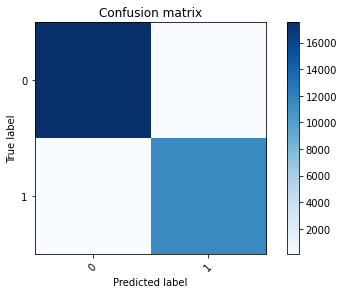

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     17604
           1       0.99      0.99      0.99     11513

    accuracy                           0.99     29117
   macro avg       0.99      0.99      0.99     29117
weighted avg       0.99      0.99      0.99     29117



In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_logistic)
print(cm)

print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(cm, names)
plt.show()

print(classification_report(y_test, y_pred_logistic))

# ROC Curve

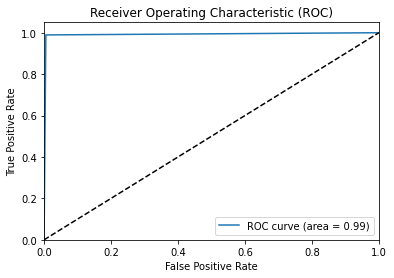

In [ ]:
plot_roc(y_pred_logistic,y_test)

# Nearest Neighbor

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=23)

In [ ]:
neigh.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

In [ ]:
y_pred_neigh = neigh.predict(x_test)

In [ ]:
# Explained variance score: 1 is perfect prediction
print('Evaluating with F1 score metric: %.2f' % f1_score(y_test, y_pred_neigh))

Evaluating with F1 score metric: 1.00


In [ ]:
score = metrics.accuracy_score(y_test, y_pred_neigh)
print("Accuracy score: {}".format(score))

Accuracy score: 0.9971494316035305


In [ ]:
score = metrics.precision_score(y_test,y_pred_neigh, average= "weighted")
print("Precision score: {}".format(score))

Precision score: 0.9971514944278265


In [ ]:
score = metrics.recall_score(y_test,y_pred_neigh, average= "weighted")
print("Recall score: {}".format(score))

Recall score: 0.9971494316035305


[[17582    22]
 [   61 11452]]
Plotting confusion matrix


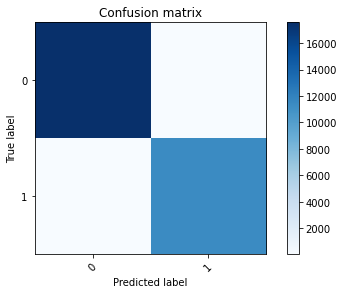

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17604
           1       1.00      0.99      1.00     11513

    accuracy                           1.00     29117
   macro avg       1.00      1.00      1.00     29117
weighted avg       1.00      1.00      1.00     29117



In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test,y_pred_neigh)
print(cm)

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, names)
plt.show()

print(classification_report(y_test, y_pred_neigh))

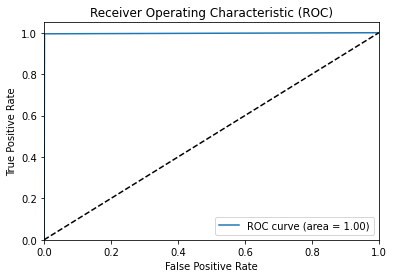

In [ ]:
plot_roc(y_pred_neigh,y_test)

# MULTINOMIAL NAIVE BAYES

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
 scaler = MinMaxScaler()

In [ ]:
input_array_min_max = scaler.fit_transform(input_array)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(input_array_min_max,output_array, test_size=0.2,random_state=42)

In [ ]:
clf = MultinomialNB()

In [ ]:
clf.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
clf_predict = clf.predict(x_test)

In [ ]:
# Explained variance score: 1 is perfect prediction
print('Evaluating with F1 score metric: %.2f' % f1_score(y_test, clf_predict))

Evaluating with F1 score metric: 0.97


In [ ]:
score = metrics.accuracy_score(y_test, clf_predict)
print("Accuracy score: {}".format(score))

Accuracy score: 0.9733489027028883


In [ ]:
score = metrics.precision_score(y_test,clf_predict, average= "weighted")
print("Precision score: {}".format(score))

Precision score: 0.9743313887541665


In [ ]:
score = metrics.recall_score(y_test,clf_predict, average= "weighted")
print("Recall score: {}".format(score))

Recall score: 0.9733489027028883


[[17582    22]
 [  754 10759]]
Plotting confusion matrix


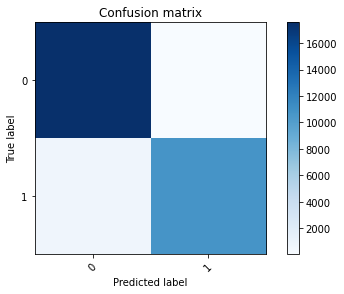

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17604
           1       1.00      0.93      0.97     11513

    accuracy                           0.97     29117
   macro avg       0.98      0.97      0.97     29117
weighted avg       0.97      0.97      0.97     29117



In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, clf_predict)
print(cm)

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, names)
plt.show()

print(classification_report(y_test, clf_predict))

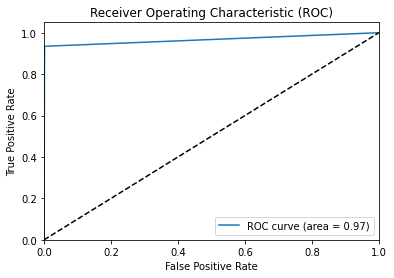

In [ ]:
plot_roc(clf_predict,y_test)

# SUPPORT VECTOR MACHINE

In [ ]:
SVM_classifier =  svm.SVC()

In [ ]:
SVM_classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_SVM = SVM_classifier.predict(x_test)

In [ ]:
# Explained variance score: 1 is perfect prediction
print('Evaluating with F1 score metric: %.2f' % f1_score(y_test, y_pred_SVM, average='micro'))

Evaluating with F1 score metric: 0.99


In [ ]:
score = metrics.accuracy_score(y_test, y_pred_SVM)
print("Accuracy score: {}".format(score))

Accuracy score: 0.9923068997492873


In [ ]:
score = metrics.precision_score(y_test,y_pred_SVM, average= "weighted")
print("Precision score: {}".format(score))

Precision score: 0.9923419571526692


In [ ]:
score = metrics.recall_score(y_test,y_pred_SVM, average= "weighted")
print("Recall score: {}".format(score))

Recall score: 0.9923068997492873


[[17565    39]
 [  185 11328]]
Plotting confusion matrix


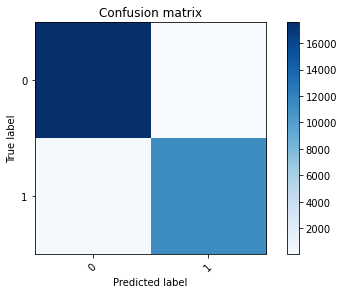

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     17604
           1       1.00      0.98      0.99     11513

    accuracy                           0.99     29117
   macro avg       0.99      0.99      0.99     29117
weighted avg       0.99      0.99      0.99     29117



In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_SVM)
print(cm)

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, names)
plt.show()

print(classification_report(y_test, y_pred_SVM))

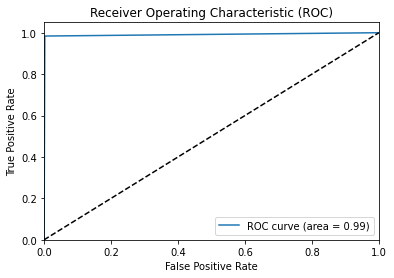

In [ ]:
plot_roc(y_pred_SVM,y_test)

# Gaussian Naive Bayes 

In [ ]:
from sklearn.naive_bayes import GaussianNB
GaussianNB_clf = GaussianNB()
GaussianNB_clf.fit(x_train, y_train)
print(x_train.shape)
y_test1 = y_test.reshape((y_test.shape[0], 1))
GaussianNB_pred = GaussianNB_clf.predict(x_test)

(116465, 121)


In [ ]:
# Explained variance score: 1 is perfect prediction
print('Evaluating with F1 score metric: %.2f' % f1_score(y_test1, GaussianNB_pred, average='micro'))

Evaluating with F1 score metric: 0.92


In [ ]:
score = metrics.accuracy_score(y_test1, GaussianNB_pred)
print("Accuracy score: {}".format(score))

Accuracy score: 0.9167496651440739


In [ ]:
score = metrics.precision_score(y_test1,GaussianNB_pred, average= "weighted")
print("Precision score: {}".format(score))

Precision score: 0.9256496167997769


In [ ]:
score = metrics.recall_score(y_test1,GaussianNB_pred, average= "weighted")
print("Recall score: {}".format(score))

Recall score: 0.9167496651440739


[[17545    59]
 [ 2365  9148]]
Plotting confusion matrix


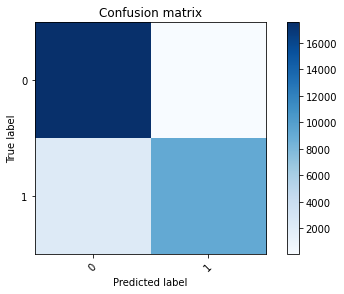

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     17604
           1       0.99      0.79      0.88     11513

    accuracy                           0.92     29117
   macro avg       0.94      0.90      0.91     29117
weighted avg       0.93      0.92      0.91     29117



In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test1, GaussianNB_pred)
print(cm)

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, names)
plt.show()

print(classification_report(y_test1, GaussianNB_pred))

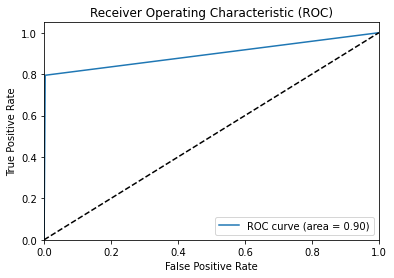

In [ ]:
plot_roc(GaussianNB_pred,y_test1)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(116465, 121)
(116465,)


In [ ]:
num_classes = 2
#Convert class vectors to one hot format
y_train = keras.utils.to_categorical(y_train,num_classes)
print(y_train[:1])
y_test = keras.utils.to_categorical(y_test,num_classes)

[[1. 0.]]


In [ ]:
print(x_train.shape)
print(y_train.shape)

(116465, 121)
(116465, 2)


# Tensorflow Classification

In [ ]:
for i in range(5):
    model_class = Sequential()
    model_class.add(Dense(50, input_dim=x_train.shape[1], activation='relu')) # Hidden 1
    model_class.add(Dense(25, activation='relu')) # Hidden 2
    model_class.add(Dense(y_train.shape[1], activation='softmax')) # Output
    #model_class.compile(optimizer = 'adam' , loss = 'categorical_crossentropy', metrics = ['accuracy'])
    model_class.compile(optimizer = 'adam' , loss = 'categorical_crossentropy', metrics = ['accuracy'])
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto') 
    checkpointer = ModelCheckpoint(filepath="best_weights_class.hdf5", verbose=0, save_best_only=True) # save best model
    model_class.fit(x_train, y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=10)

Epoch 1/10
3640/3640 - 4s - loss: 0.0328 - accuracy: 0.9902 - val_loss: 0.0132 - val_accuracy: 0.9961
Epoch 2/10
3640/3640 - 4s - loss: 0.0096 - accuracy: 0.9974 - val_loss: 0.0120 - val_accuracy: 0.9962
Epoch 3/10
3640/3640 - 4s - loss: 0.0075 - accuracy: 0.9978 - val_loss: 0.0076 - val_accuracy: 0.9980
Epoch 4/10
3640/3640 - 4s - loss: 0.0066 - accuracy: 0.9980 - val_loss: 0.0078 - val_accuracy: 0.9977
Epoch 5/10
3640/3640 - 4s - loss: 0.0061 - accuracy: 0.9981 - val_loss: 0.0088 - val_accuracy: 0.9976
Epoch 00005: early stopping
Epoch 1/10
3640/3640 - 4s - loss: 0.0346 - accuracy: 0.9895 - val_loss: 0.0153 - val_accuracy: 0.9957
Epoch 2/10
3640/3640 - 4s - loss: 0.0105 - accuracy: 0.9970 - val_loss: 0.0099 - val_accuracy: 0.9969
Epoch 3/10
3640/3640 - 4s - loss: 0.0073 - accuracy: 0.9980 - val_loss: 0.0123 - val_accuracy: 0.9958
Epoch 4/10
3640/3640 - 4s - loss: 0.0063 - accuracy: 0.9981 - val_loss: 0.0094 - val_accuracy: 0.9972
Epoch 00004: early stopping
Epoch 1/10
3640/3640 - 4s 

In [ ]:
model_class.load_weights('best_weights_class.hdf5') # load weights from best model

In [ ]:
Tf_class_pred = model_class.predict(x_test)
pred1 = np.argmax(Tf_class_pred ,axis=1) # raw probabilities to chosen class (highest probability)
print(pred1)

[0 1 0 ... 1 1 0]


In [ ]:
y_true= np.argmax(y_test,axis=1) 

In [ ]:
score = metrics.accuracy_score(y_true, pred1)
print("Accuracy score: {}".format(score))

Accuracy score: 0.9983171343201566


In [ ]:
# Explained variance score: 1 is perfect prediction
print('Evaluating with F1 score metric: %.2f' % f1_score(y_true,pred1 , average='micro'))

Evaluating with F1 score metric: 1.00


In [ ]:
pre_score = metrics.precision_score(y_true, pred1, average= "weighted")
print("Precision score: {}".format(pre_score))

Precision score: 0.9983173082922975


In [ ]:
score = metrics.recall_score(y_true,pred1, average= "weighted")
print("Recall score: {}".format(score))

Recall score: 0.9983171343201566


[[17587    17]
 [   32 11481]]
Plotting confusion matrix


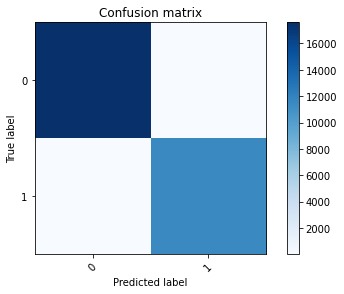

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17604
           1       1.00      1.00      1.00     11513

    accuracy                           1.00     29117
   macro avg       1.00      1.00      1.00     29117
weighted avg       1.00      1.00      1.00     29117



In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_true,pred1)
print(cm)

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, names)
plt.show()

print(classification_report(y_true, pred1))

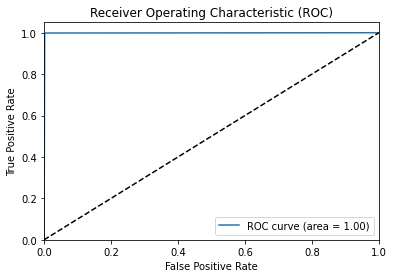

In [ ]:
plot_roc(y_true,pred1)

# CNN 

In [ ]:
print(x_train.shape)
print(y_train.shape)

(116465, 121)
(116465, 2)


In [ ]:
x_train2 = x_train.reshape((116465,1,121,1))

print(x_train2[:2])
print(x_train2.shape)

[[[[0.00000000e+00]
   [2.87001718e-07]
   [1.63709677e-04]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [2.34833659e-02]
   [6.65362035e-02]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [1.00000000e+00]
   [0.00000000e+00]
   [1.20000000e-01]
   [1.17647059e-01]
   [1.00000000e+00]
   [1.00000000e+00]
   [0.00000000e+00]
   [3.00000000e-02]
   [1.00000000e-02]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [1.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]


In [ ]:
# define a CNN
cnn = Sequential()
cnn.add(Conv2D(64, kernel_size=(1, 10), strides=(1, 1),padding='valid',
                 activation='relu',
                 input_shape=(1,121,1)))

    # the above code is equivalent to 
    # model.add(Conv1D(64, kernel_size=3, strides=1, activation='relu', input_shape=(128, 1)))

cnn.add(MaxPooling2D(pool_size=(1,2)))

cnn.add(Flatten())
cnn.add(Dense(30, activation="relu"))

cnn.summary()   
cnn.add(Dense(num_classes, activation="softmax"))
cnn.summary()
    
# define optimizer and objective, compile cnn
cnn.compile(loss="categorical_crossentropy", optimizer="adam" , metrics = ['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto') 
checkpointer = ModelCheckpoint(filepath="best_weights_cnn.hdf5", verbose=0, save_best_only=True) # save best model

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 112, 64)        704       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 56, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3584)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 30)                107550    
Total params: 108,254
Trainable params: 108,254
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 112, 64)        704       
__________________________

In [ ]:
cnn.fit(x_train2, y_train,validation_split=0.2,callbacks=[monitor,checkpointer],verbose=2,epochs=10)

Epoch 1/10
2912/2912 - 14s - loss: 0.0348 - accuracy: 0.9896 - val_loss: 0.0207 - val_accuracy: 0.9944
Epoch 2/10
2912/2912 - 14s - loss: 0.0118 - accuracy: 0.9966 - val_loss: 0.0138 - val_accuracy: 0.9960
Epoch 3/10
2912/2912 - 14s - loss: 0.0085 - accuracy: 0.9974 - val_loss: 0.0101 - val_accuracy: 0.9970
Epoch 4/10
2912/2912 - 14s - loss: 0.0074 - accuracy: 0.9979 - val_loss: 0.0084 - val_accuracy: 0.9976
Epoch 5/10
2912/2912 - 14s - loss: 0.0064 - accuracy: 0.9981 - val_loss: 0.0089 - val_accuracy: 0.9975
Epoch 6/10
2912/2912 - 14s - loss: 0.0057 - accuracy: 0.9983 - val_loss: 0.0071 - val_accuracy: 0.9980
Epoch 7/10
2912/2912 - 14s - loss: 0.0054 - accuracy: 0.9984 - val_loss: 0.0083 - val_accuracy: 0.9976
Epoch 8/10
2912/2912 - 14s - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.0078 - val_accuracy: 0.9975
Epoch 00008: early stopping


In [ ]:
cnn.load_weights('best_weights_cnn.hdf5') # load weights from best model

In [ ]:
x_test = x_test.reshape((-1,1,121,1))
print(x_test.shape)

(29117, 1, 121, 1)


In [ ]:
pred = cnn.predict(x_test)
#pred = np.argmax(pred,axis=1)
print("Shape: {}".format(pred.shape))
print(pred)

Shape: (29117, 2)
[[1.0000000e+00 2.0976863e-08]
 [1.1189596e-09 1.0000000e+00]
 [9.9999392e-01 6.0276520e-06]
 ...
 [2.7906632e-08 1.0000000e+00]
 [2.4877719e-04 9.9975127e-01]
 [9.9999833e-01 1.7129379e-06]]


In [ ]:
print(y_test.shape)

(29117, 2)


In [ ]:
pred=pred.reshape((-1,2))
print(pred.shape)

(29117, 2)


In [ ]:
score = metrics.accuracy_score(y_test, pred.round())
print('Accuracy: {}'.format(score))

Accuracy: 0.9979050039495827


In [ ]:
f1 = metrics.f1_score(y_test, pred.round(), average='weighted')
print('Averaged F1: {}'.format(f1))

Averaged F1: 0.9979050196870239


In [ ]:
print(metrics.classification_report(y_test, pred.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17604
           1       1.00      1.00      1.00     11513

   micro avg       1.00      1.00      1.00     29117
   macro avg       1.00      1.00      1.00     29117
weighted avg       1.00      1.00      1.00     29117
 samples avg       1.00      1.00      1.00     29117



In [ ]:
score = metrics.precision_score(y_test,pred.round(), average= "weighted")
print("Precision score: {}".format(score))

Precision score: 0.9979050378857556


In [ ]:
score = metrics.recall_score(y_test,pred.round(), average= "weighted")
print("Recall score: {}".format(score))

Recall score: 0.9979050039495827


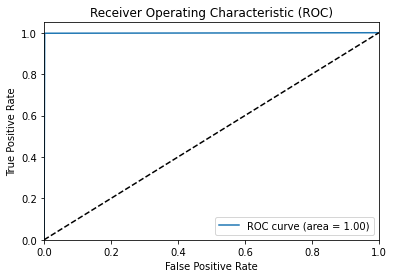

In [ ]:
plot_roc(pred.round().argmax(axis=1),y_test.argmax(axis=1))

[[17573    31]
 [   30 11483]]
Plotting confusion matrix


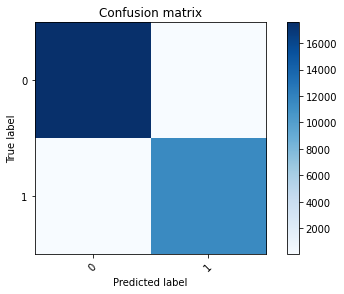

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17604
           1       1.00      1.00      1.00     11513

    accuracy                           1.00     29117
   macro avg       1.00      1.00      1.00     29117
weighted avg       1.00      1.00      1.00     29117



In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), pred.round().argmax(axis=1))
print(cm)

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, names)
plt.show()

print(classification_report(y_test.argmax(axis=1), pred.round().argmax(axis=1)))